In [6]:
# Neural Network with Hierarchical Clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
# Generate random dataset
np.random.seed(42)
X, y_true = make_blobs(n_samples=200, centers=3, cluster_std=1.0, random_state=42)
print(f"Dataset created: {X.shape[0]} samples, {X.shape[1]} features")

Dataset created: 200 samples, 2 features


In [8]:
# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_clusters = hierarchical.fit_predict(X)
print(f"Hierarchical clustering completed. Found {len(np.unique(y_clusters))} clusters")

Hierarchical clustering completed. Found 3 clusters


In [9]:
# Train Neural Network
X_train, X_test, y_train, y_test = train_test_split(X, y_clusters, test_size=0.3, random_state=42)

# Create and train neural network
nn = MLPClassifier(hidden_layer_sizes=(8, 6), max_iter=500, random_state=42)
nn.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = nn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy: {accuracy:.3f}")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Neural Network Accuracy: 1.000
Training set: 140 samples
Test set: 60 samples


/home/thomas/Bureau/Spe-IA/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


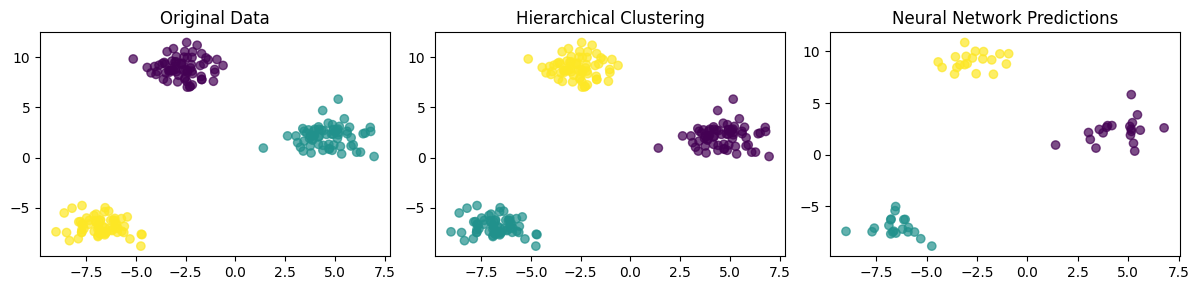

In [10]:
# Visualize Results
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Original data
axes[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', alpha=0.7)
axes[0].set_title('Original Data')

# Hierarchical clustering
axes[1].scatter(X[:, 0], X[:, 1], c=y_clusters, cmap='viridis', alpha=0.7)
axes[1].set_title('Hierarchical Clustering')

# Neural network predictions
axes[2].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', alpha=0.7)
axes[2].set_title('Neural Network Predictions')

plt.tight_layout()
plt.show()

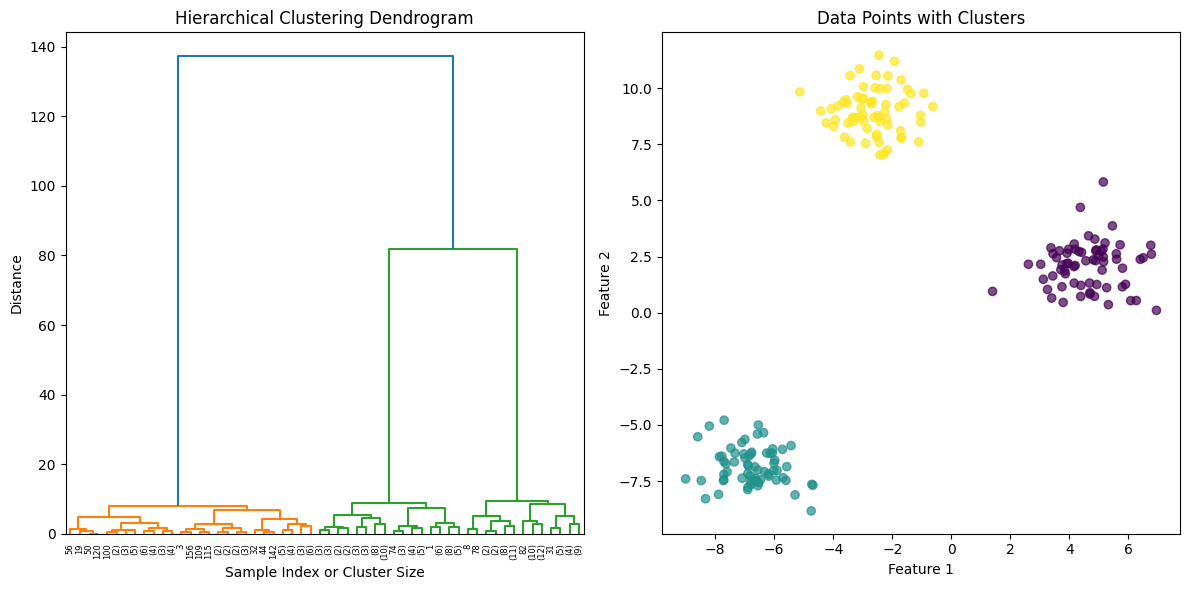

In [11]:
# Create dendrogram (tree-like graph) for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate linkage matrix for dendrogram
linkage_matrix = linkage(X, method='ward')

# Create dendrogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')

# Show data with clusters
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_clusters, cmap='viridis', alpha=0.7)
plt.title('Data Points with Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()